In [84]:
#!pip install wordcloud
import re
import wordcloud
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
stories=pd.read_csv('cleaned_hm.csv')
stories
text=''
for i in stories.index:
    text=text+' '+stories.loc[i,'cleaned_hm']
len(text)

9460833

In [3]:
text = re.sub(r'==.*?==+', '', text)
text = text.replace('\n', '')

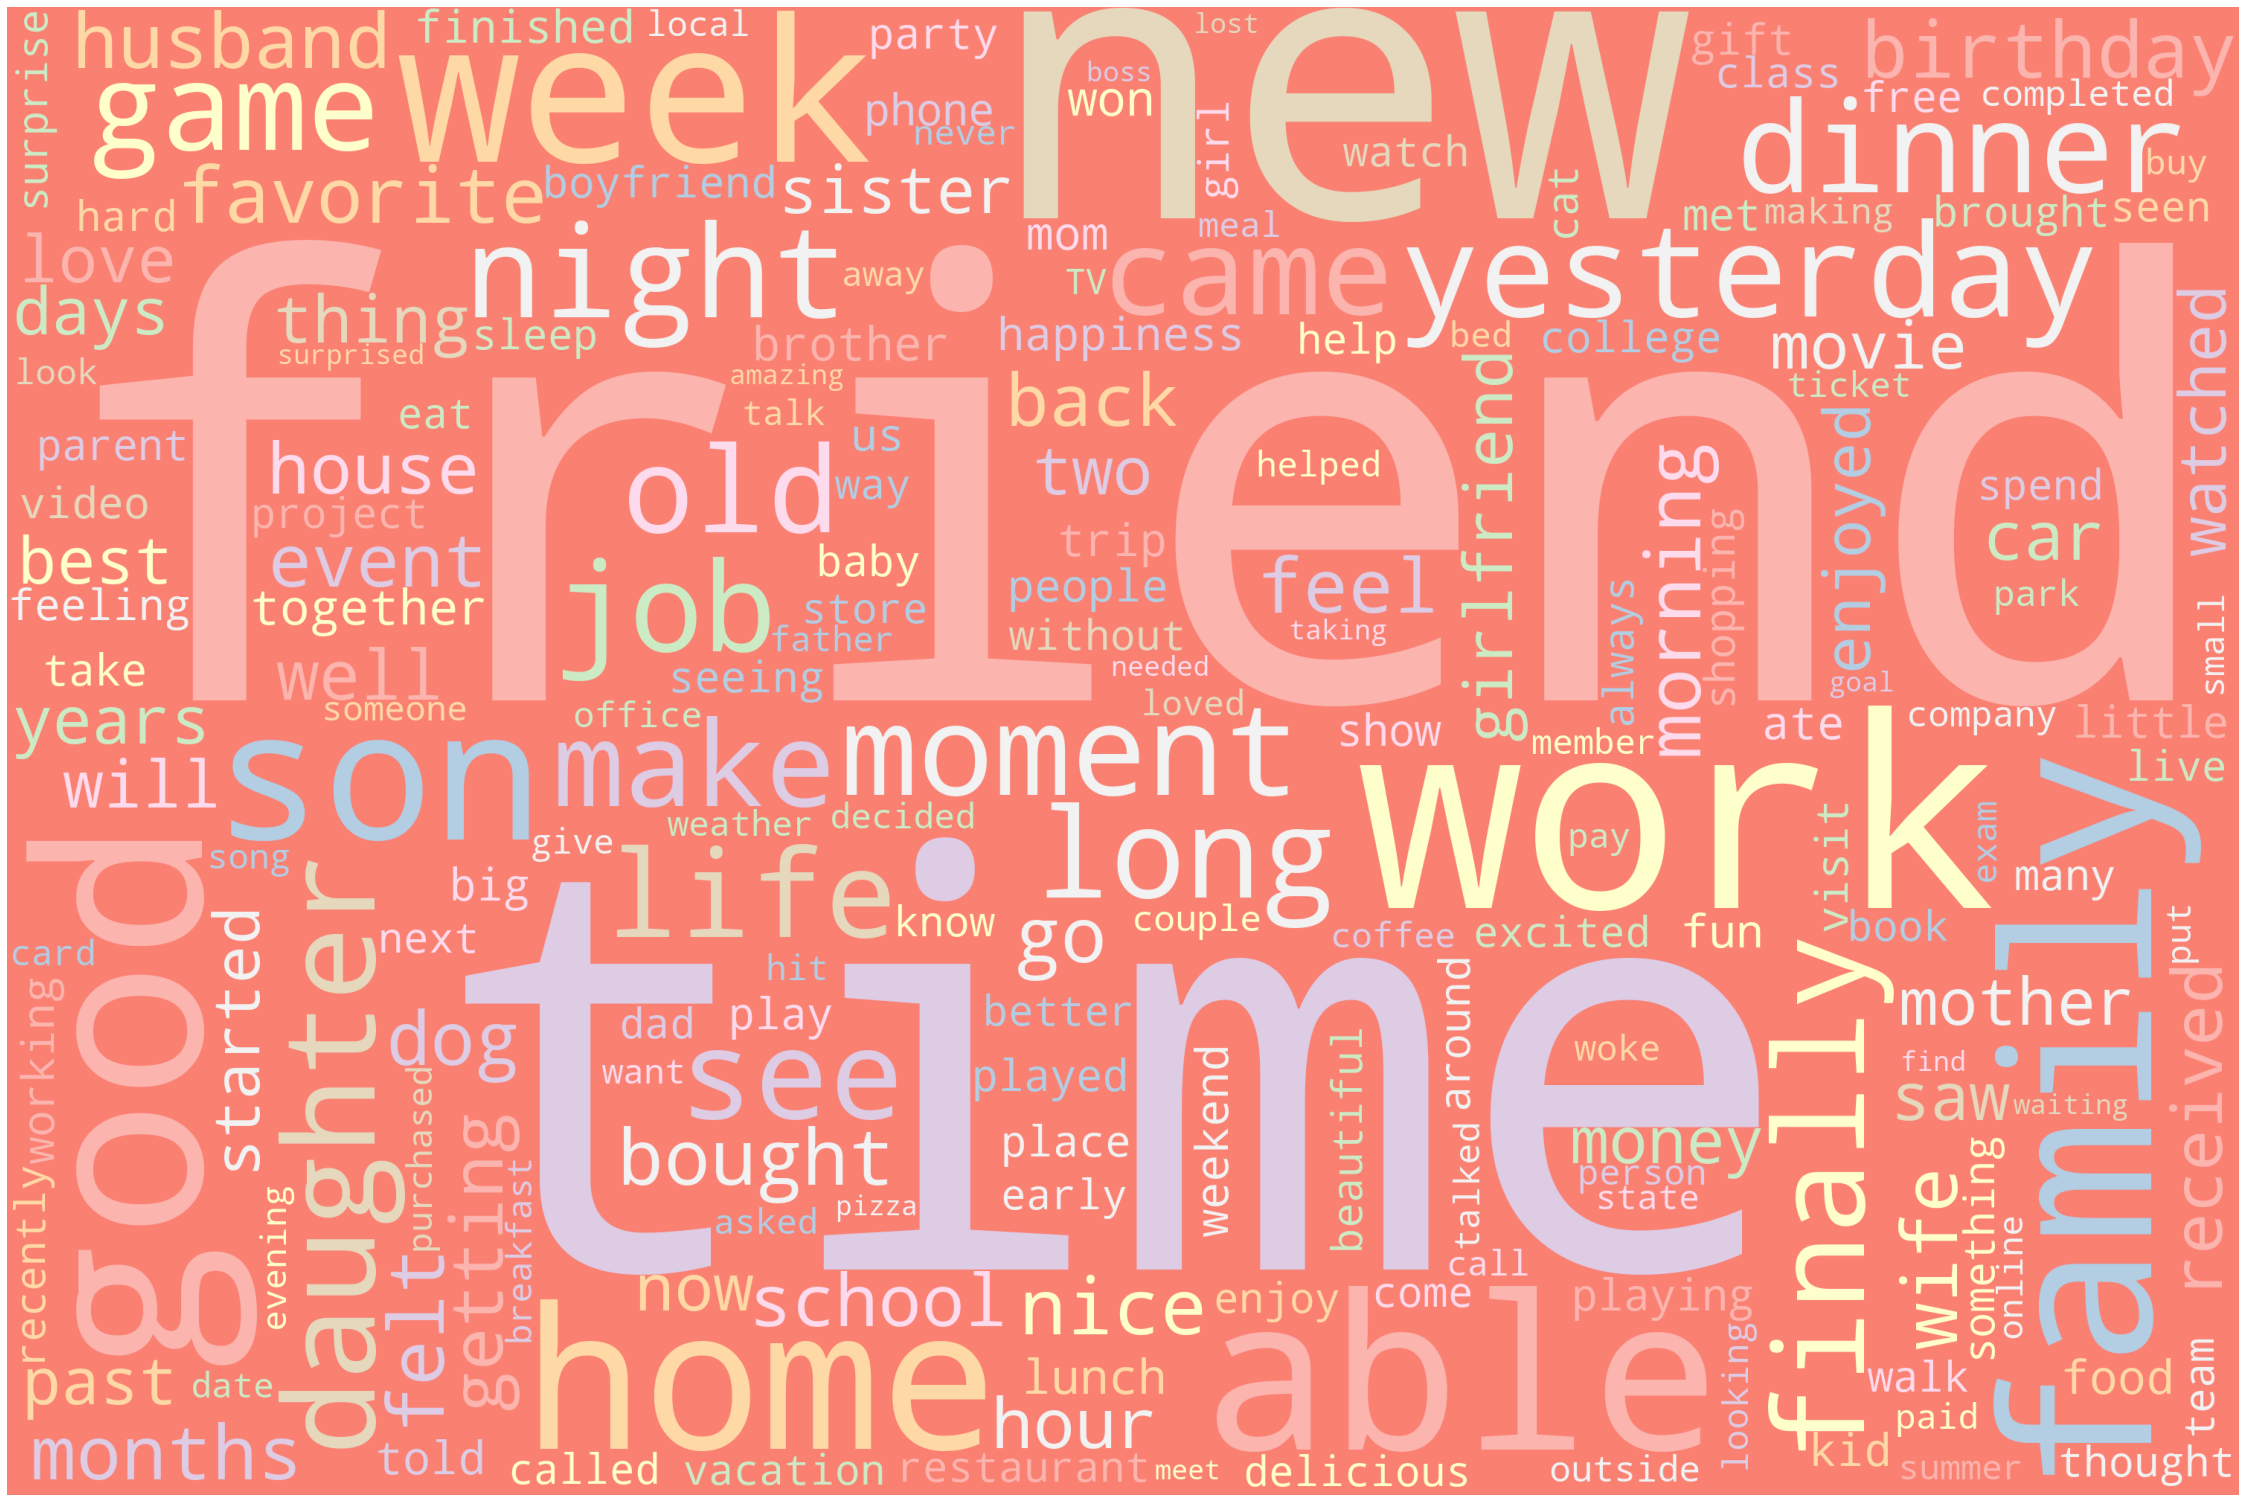

In [4]:
# Import package
import matplotlib.pyplot as plt
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

    # Import package
from wordcloud import WordCloud, STOPWORDS
MOREWORDS={'made','got','last','first','today','day','month','great','going','really','took','every','spent',
           'much','gave','said','u','three','ago','another','wanted','found','still','watching','one','happy','year',
          'lot','alway','went','done','even','happiest'}
ALLSTOPWORDS=STOPWORDS.union(MOREWORDS)
ALLSTOPWORDS
# Generate word cloud
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = ALLSTOPWORDS).generate(text)
# Plot
plot_cloud(wordcloud)

In [5]:
demog=pd.read_csv('demographic.csv')
demog

,wid,age,country,gender,marital,parenthood
0,1,37.0,USA,m,married,y
1,2,29.0,IND,m,married,y
2,3,25,IND,m,single,n
3,4,32,USA,m,married,y
4,5,29,USA,m,married,y
...,...,...,...,...,...,...
10839,13835,25.0,USA,m,single,n
10840,13836,31,USA,m,single,y
10841,13837,22.0,USA,f,single,n
10842,13838,38,USA,f,married,y


In [47]:
def CleanAge(row):
    try:
        return int(float(row['age']))
    except:
        return -1
demog['newage']=demog.apply(CleanAge,axis=1)

ValueError: invalid literal for int() with base 10: '29.0'

In [49]:
DFunion=pd.merge(stories,demog,how='inner',on='wid')
DFunion

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category,age,country,gender,marital,parenthood,newage
0,27673,2053,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection,35,USA,m,single,n,35
1,27873,2053,24h,I played a new game that was fun and got to en...,I played a new game that was fun and got to en...,True,1,NaN,leisure,35,USA,m,single,n,35
2,28073,2053,24h,I listened to some music and heard an entire a...,I listened to some music and heard an entire a...,True,1,NaN,leisure,35,USA,m,single,n,35
3,33522,2053,24h,Went to see a movie with my friend,Went to see a movie with my friend,True,1,NaN,bonding,35,USA,m,single,n,35
4,34522,2053,24h,"Played guitar, learning a song on it","Played guitar, learning a song on it",True,1,NaN,leisure,35,USA,m,single,n,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100530,128251,11402,24h,Was told I was a great employee by my boss.,Was told I was a great employee by my boss.,True,1,NaN,achievement,32,USA,m,married,n,32
100531,128751,11402,24h,Fixed my car.,Fixed my car.,True,1,NaN,achievement,32,USA,m,married,n,32
100532,127759,11050,24h,Four year back I lost my job. Now I am living ...,Four year back I lost my job. Now I am living ...,True,6,NaN,achievement,65,IND,m,married,y,65
100533,128259,11050,24h,Yesterday evening I received a call from unkno...,Yesterday evening I received a call from unkno...,True,7,bonding,bonding,65,IND,m,married,y,65


In [50]:
StoriesAgeDF=DFunion[['cleaned_hm','newage']].copy()
StoriesAgeDF

,cleaned_hm,newage
0,I went on a successful date with someone I fel...,35
1,I played a new game that was fun and got to en...,35
2,I listened to some music and heard an entire a...,35
3,Went to see a movie with my friend,35
4,"Played guitar, learning a song on it",35
...,...,...
100530,Was told I was a great employee by my boss.,32
100531,Fixed my car.,32
100532,Four year back I lost my job. Now I am living ...,65
100533,Yesterday evening I received a call from unkno...,65


In [66]:
favorites=['time','friend','work','family','new']
def Words(row):
    wordlist=[]
    for word in favorites:
        if re.search(word,str(row['cleaned_hm']).lower()):
            wordlist.append(1)
        else:
            wordlist.append(0)
    return np.array(wordlist)
StoriesAgeDF['Frequencies']=StoriesAgeDF.apply(Words,axis=1)
StoriesAgeDF

,cleaned_hm,newage,Frequencies
0,I went on a successful date with someone I fel...,35,"[0, 0, 0, 0, 0]"
1,I played a new game that was fun and got to en...,35,"[0, 0, 0, 0, 1]"
2,I listened to some music and heard an entire a...,35,"[0, 0, 0, 0, 0]"
3,Went to see a movie with my friend,35,"[0, 1, 0, 0, 0]"
4,"Played guitar, learning a song on it",35,"[0, 0, 0, 0, 0]"
...,...,...,...
100530,Was told I was a great employee by my boss.,32,"[0, 0, 0, 0, 0]"
100531,Fixed my car.,32,"[0, 0, 0, 0, 0]"
100532,Four year back I lost my job. Now I am living ...,65,"[0, 0, 1, 0, 0]"
100533,Yesterday evening I received a call from unkno...,65,"[0, 1, 0, 0, 0]"


In [72]:
df=StoriesAgeDF[StoriesAgeDF['newage']>10]
df=df[df['newage']<91]

In [83]:
def GetGroup(row):
    return int(row['newage']/5)
df['AgeGroup']=df.apply(GetGroup,axis=1)
AgeGroups=df.groupby('AgeGroup')
Final=[]
for x,y in AgeGroups:
    Freqs=list(y['Frequencies'])
    Fsum=sum(Freqs)/len(y)
    Final.append((x,Fsum))
Final

[(3, array([0.0651289 , 0.16757123, 0.07259159, 0.03052917, 0.07869742])),
 (4, array([0.09644274, 0.18663622, 0.09361856, 0.03761567, 0.09560149])),
 (5, array([0.09171906, 0.15106075, 0.1075211 , 0.04330431, 0.09830885])),
 (6, array([0.09168453, 0.12566711, 0.1073302 , 0.044337  , 0.09747754])),
 (7, array([0.08785615, 0.09253633, 0.11092865, 0.04277855, 0.08892356])),
 (8, array([0.08268809, 0.09379109, 0.10284879, 0.04572681, 0.08648649])),
 (9, array([0.08910891, 0.08337676, 0.09692548, 0.04663887, 0.07373632])),
 (10, array([0.08639093, 0.09306204, 0.11307538, 0.03302201, 0.07404937])),
 (11, array([0.08439024, 0.0795122 , 0.08536585, 0.0404878 , 0.06878049])),
 (12, array([0.08682635, 0.10254491, 0.07709581, 0.03517964, 0.10853293])),
 (13, array([0.05897772, 0.09698558, 0.0406291 , 0.0249017 , 0.09960682])),
 (14, array([0.06730769, 0.04487179, 0.04807692, 0.02884615, 0.1025641 ])),
 (15, array([0.        , 0.04761905, 0.04761905, 0.07142857, 0.0952381 ])),
 (16, array([0.04  

In [99]:
Groups=[5*item[0] for item in Final]
time=[item[1][0] for item in Final]
friend=[item[1][1] for item in Final]
work=[item[1][2] for item in Final]
family=[item[1][3] for item in Final]
new=[item[1][4] for item in Final]

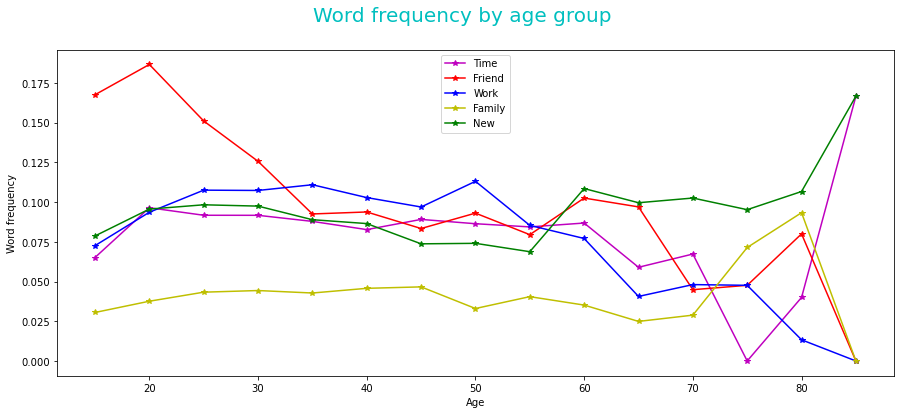

In [101]:
# Creamos un objeto de la figura
fig  = plt.figure(figsize =(15,6)) # el parámetro figsize cambia el tamaño de la figura 

# Las siguiente dos líneas de código  generan las líneas en la gráfica 
# La etiqueta se usa cuando se crea una leyenda
plt.plot(Groups, time, 'm*-', label = 'Time') 
plt.plot(Groups, friend, 'r*-', label = 'Friend')
plt.plot(Groups, work, 'b*-', label = 'Work')
plt.plot(Groups, family, 'y*-', label = 'Family')
plt.plot(Groups, new, 'g*-', label = 'New')

##**************************************************************************##
##***********************Información adicional******************************##
##**************************************************************************##
# Etiquetas de los ejes 
plt.ylabel('Word frequency') 
plt.xlabel('Age')
# Título de la figura
fig.suptitle('Word frequency by age group', fontsize =20, color='c')
# Crear una leyenda de la gráfica
# Usar plt.legend(loc= (num, num)) para cambiar la posición de la leyenda
plt.legend() 
# Para guardar la gráfica ejecuta
plt.savefig('Mi primera gráfica en python.png')
##**************************************************************************##
##**************************************************************************##
plt.show()